In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML, display
plt.rcParams["animation.html"] = "jshtml"

# Option 2: Solve a Puzzle Using Depth-First Search

The graph below has 8 vertices labeled with the letters S through Z.  Some of the vertices are connected by edges. 

*Puzzle*: Replace the $8$ letters with the numbers $1$ to $8$ so that adjacent vertices (connected by an edge) are assigned numbers that differ by more than $1$. (For example, if the number $4$ is assigned to vertex S, then the numbers $3$ and $5$ cannot be assigned to T, U, or V.) There is only **one possible assignment** of numbers if reflections and rotations are ignored.

<img src="http://www.coloradomath.org/python/puzzle_graph.jpg" width="350" height="232" />

* Write a function **puzzle()** to find the solution using **depth-first search**. The function forms a set (or list) of vertices and a set (or list) of edges to represent the graph shown. Then the function begins with vertex S and visits adjacent vertices, assigning valid numbers to the vertices, until a solution is found. The return value is in the form of a list of tuples `(vertex, number)`, (ex: `[('S', 5), ('T', 9), ...]`). (Do not try to optimize the code by working out a solution by hand.)

* Use animation to **illustrate the depth-first search process** that leads to the solution. Here is a sample visualization: http://coloradomath.org/python/puzzle-dfs-partial.gif.

In [5]:
class Node:
    def __init__(self, value, color, parent, typ):
        self.value = value
        self.color = color
        self.parent = parent
        self.type = typ
        self.ID = None
        self.child_vals = set()  # set of possible child values

In [7]:
def valid_value(lett, value, answer):
    '''Checks whether a node is allowed to have its value.'''
    
    adjacenecy_dict = {'S':'TUV', 'T':'SUXY', 'U':'STVWXY', 'V':'SUWX', 
                   'W':'UVXZ', 'X':'TUVWYZ', 'Y':'TUXZ', 'Z':'WXY'}
    
    letts = 'STUVWXYZ'
    i = letts.find(lett)
    
    if i == 0:
        return True
    
    for prev_let in letts[:i]:
        if prev_let in adjacenecy_dict[lett]:
            if value > (answer[prev_let] + 1):
                continue
            elif value < (answer[prev_let] - 1):
                continue
            else:
                return False
            
    return True 

In [8]:
def DFS_visit(node, node_dict, answer):
    '''create a list of children nodes
    for each, call DFS visit on them'''

#     print((node.ID))

    # check if the tree height is equal to 8
    if node.type == 'Z':
        answer['Z'] = node.value
        return answer

    
    # adjust the answer dictionary
    letts = 'STUVWXYZ'
    idx = letts.find(node.type)
    '''delete any history that doesn't need to be there, this way the childID will always be unique'''
    for lett in letts[(idx+1):]:  
        if lett in answer.keys():
            del(answer[lett])
    answer[node.type] = node.value       

#     print(answer)

    
    # find the children
    child_type = letts[letts.find(node.type)+1]  # the type of the child will be the next letter in letts
    child_nodes = []    # list of the possible values for children nodes of the node we are searching on
    for val in node.child_vals: 

        '''for each possible child of the node, see if it has already been visited, if not then make a node for 
        that child and add it to node_dict'''

        history = ''.join(str(num) for num in list(answer.values()))
        childID = (history, child_type, val)  

        if childID in node_dict.keys(): # this child has already been discovered 
            if node_dict[childID].color == 'black':
                continue
            else:
                child_nodes.append((childID, node_dict[childID]))
        else:
            if valid_value(child_type, val, answer): # if this value does not break the conditions 
                n = Node(value=val, color='white', parent=node, typ=child_type)
                n.child_vals = node.child_vals - {n.value}
                n.ID = childID
                child_nodes.append((childID, n))
                node_dict[childID] = n
                
#     print([(ID) for (ID,n) in child_nodes])

    
    # if the node has no children, call the function on the nodes parent    
    if child_nodes == []:
        node_dict[node.ID].color = 'black'
        if node.type == 'S':
            '''the entire S==x subtree has been searched'''
            return answer
        else:
            return DFS_visit(node.parent, node_dict, answer)
    '''now when the parent gets visited again, this node will not show up in its list of children'''

    
    # continue the search on the children
    for childID, node in child_nodes:
        return DFS_visit(node, node_dict, answer)

In [9]:
def puzzle():
    
    roots = []
    for i in range(1,9):
        n = Node(value=i, color='white', parent=None, typ = 'S')
        n.child_vals = {1,2,3,4,5,6,7,8} - {n.value}
        n.ID = (n.type, n.value)
        roots.append((n.ID, n))

    answer = {}    
    
    for ID, node in roots:
        answer[node.type] = node.value
        node_dict = {}
        node_dict[ID] = node
        a = DFS_visit(node, node_dict, answer)
        if len(a.keys()) == 8:
            keys = a.keys()
            vals = a.values()
            return list(zip(keys,vals))

In [10]:
puzzle()

[('S', 2),
 ('T', 5),
 ('U', 8),
 ('V', 6),
 ('W', 4),
 ('X', 1),
 ('Y', 3),
 ('Z', 7)]

### Animation

In [11]:
def get_fill_list(answer_dict):
    i = len(answer_dict.values())
    num_lst = list(answer_dict.values())

    letts= 'STUVWXYZ'
    let_lst = list(letts[i:])
    
    pink_idx = i-1
    
    return (num_lst+let_lst, pink_idx)

In [12]:
def anim_puzzle():
    
    # every time DFS_visit_anim gets called, it will add a frame (aka fill_lst) to frame_lst
    frame_lst = []
    def DFS_visit_anim(node, node_dict, answer):
        # check if the tree height is equal to 8
        if node.type == 'Z':
            answer['Z'] = node.value
            fill_lst, pink_idx = get_fill_list(answer)
            frame_lst.append((fill_lst,pink_idx))
            return answer

        # adjust the answer dictionary and add a fill_lst to frame_lst
        letts = 'STUVWXYZ'
        idx = letts.find(node.type)
        for lett in letts[(idx+1):]:  
            if lett in answer.keys():
                del(answer[lett])
        answer[node.type] = node.value  
        fill_lst, pink_idx = get_fill_list(answer)
        frame_lst.append((fill_lst,pink_idx))

        child_type = letts[letts.find(node.type)+1] 
        child_nodes = []    
        for val in node.child_vals: 

            history = ''.join(str(num) for num in list(answer.values()))
            childID = (history, child_type, val)  

            if childID in node_dict.keys(): 
                if node_dict[childID].color == 'black':
                    continue
                else:
                    child_nodes.append((childID, node_dict[childID]))
            else:
                if valid_value(child_type, val, answer): 
                    n = Node(value=val, color='white', parent=node, typ=child_type)
                    n.child_vals = node.child_vals - {n.value}
                    n.ID = childID
                    child_nodes.append((childID, n))
                    node_dict[childID] = n

        if child_nodes == []:
            node_dict[node.ID].color = 'black'
            if node.type == 'S':
                return answer
            else:
                return DFS_visit_anim(node.parent, node_dict, answer)

        for childID, node in child_nodes:
            return DFS_visit_anim(node, node_dict, answer)
    
    
    roots = []
    for i in range(1,9):
        n = Node(value=i, color='white', parent=None, typ = 'S')
        n.child_vals = {1,2,3,4,5,6,7,8} - {n.value}
        n.ID = (n.type, n.value)
        roots.append((n.ID, n))

    answer = {}
    for ID, node in roots:
        answer[node.type] = node.value
        node_dict = {}
        node_dict[ID] = node
        a = DFS_visit_anim(node, node_dict, answer)
        if len(a.keys()) == 8:
            break
            
#     print(frame_lst)

    # PLOT
    fig, ax = plt.subplots()
    
    adjacenecy_dict = {'S':'TUV', 'T':'SUXY', 'U':'STVWXY', 'V':'SUWX', 
                   'W':'UVXZ', 'X':'TUVWYZ', 'Y':'TUXZ', 'Z':'WXY'}
    circle_coords = {'S':(10,30), 'T':(0,20), 'U':(10,20), 'V':(20,20), 
                     'W':(20,10), 'X':(10,10), 'Y':(0,10), 'Z':(10,0)}
    xs,ys = zip(*list(circle_coords.values()))
    xs = list(xs)
    ys = list(ys)
    
    def draw(fval):
        fill_lst = frame_lst[fval][0]
        pink_idx = frame_lst[fval][1]
        
        ax.clear()
        ax.set_ylim(-8,38)
        ax.set_xlim(-5,30)
        fig.set_figheight(8)
        fig.set_figwidth(6)
        ax.set_axis_off()
        for let in circle_coords.keys():
            v = circle_coords[let]
            for u in adjacenecy_dict[let]:
                xvals = [v[0], circle_coords[u][0]]
                yvals = [v[1], circle_coords[u][1]]
                ax.plot(xvals,yvals,'k')
        
        ax.plot(xs[:pink_idx],ys[:pink_idx],'o', ms=50, color='lightblue')
        ax.plot(xs[pink_idx],ys[pink_idx],'o', ms=50, color='lightpink')
        ax.plot(xs[pink_idx+1:],ys[pink_idx+1:],'o', ms=50, color='lightgrey')

        for idx in range(len(fill_lst)):
            x,y = xs[idx],ys[idx]
            ax.text(x,y, fill_lst[idx], horizontalalignment='center',verticalalignment='center')
        
        plt.show()
    
    return anim.FuncAnimation(fig, draw, frames=len(frame_lst), interval=800)

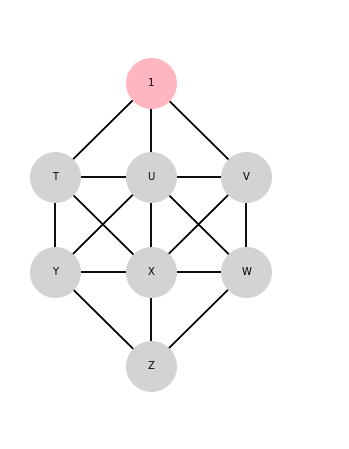

In [13]:
anim_puzzle()